In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.cluster.hierarchy import dendrogram

In [11]:
motifs = glob.glob('mSp_scATAC-seq/homer_motifs/*_homer_knownResults.txt')

dfs = []

for m in motifs:
    cell = (m.split('/')[-1]
             .split('_')[1])
    en_mtf = pd.read_table(m)
    en_mtf = en_mtf[en_mtf['P-value'] < 1e-20]
    df = pd.DataFrame(data=en_mtf['P-value'].values,
                      columns=['cluster_{}'.format(cell)],
                      index=en_mtf['Motif Name'])
    dfs.append(df)

mtf_mtx = pd.concat(dfs, axis=1, join='outer', sort=True)

In [12]:
mtf_mtx.shape

(41, 12)

In [13]:
rename = {}

for i in mtf_mtx.index.values:
    rename[i] = i.split('/')[0]

mtf_mtx.rename(index=rename, inplace=True)
mtf_mtx.head(2)

,cluster_0,cluster_10,cluster_11,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
Atf3(bZIP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e-21
"Brn1(POU,Homeobox)",NaN,NaN,NaN,NaN,NaN,NaN,1.000000e-23,NaN,NaN,NaN,NaN,NaN


In [14]:
mtf_mtx.fillna(1, inplace=True)
mtf_mtx = -1 * mtf_mtx.apply(np.log)

In [15]:
mtf_mtx = mtf_mtx.loc[:,['cluster_{}'.format(i) for i in range(12)]]
mtf_mtx.head()

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11
Atf3(bZIP),-0.000000,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.0,48.354287,-0.000000,-0.0
"Brn1(POU,Homeobox)",-0.000000,-0.000000,-0.0,-0.000000,52.959457,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.000000,-0.0
CEBP(bZIP),156.575786,-0.000000,-0.0,-0.000000,-0.000000,158.878371,-0.0,-0.0,-0.0,-0.000000,-0.000000,-0.0
CEBP:AP1(bZIP),66.774968,-0.000000,-0.0,-0.000000,-0.000000,52.959457,-0.0,-0.0,-0.0,-0.000000,-0.000000,-0.0
EHF(ETS),66.774968,55.262042,-0.0,50.656872,-0.000000,55.262042,-0.0,-0.0,-0.0,52.959457,71.380138,-0.0


In [16]:
color12 = ['#a6cee3', '#333333', '#b2df8a', '#33a02c',
           '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00',
           '#cab2d6', '#6a3d9a', '#1f78b4', '#b15928']

mtf_mtx.rename(columns={ 'cluster_0' : 'GN',
                         'cluster_1' : 'B.Fo',
                         'cluster_2' : 'CD8T Mem',
                         'cluster_3' : 'CD4T Nve',
                         'cluster_4' : 'B.MZ',
                         'cluster_5' : 'MF',
                         'cluster_6' : 'CD8T Nve',
                         'cluster_7' : 'B.T2',
                         'cluster_8' : 'CD27- NK',
                         'cluster_9' : 'Treg',
                        'cluster_10' : 'DC',
                        'cluster_11' : 'CD27+ NK'},
               inplace=True)

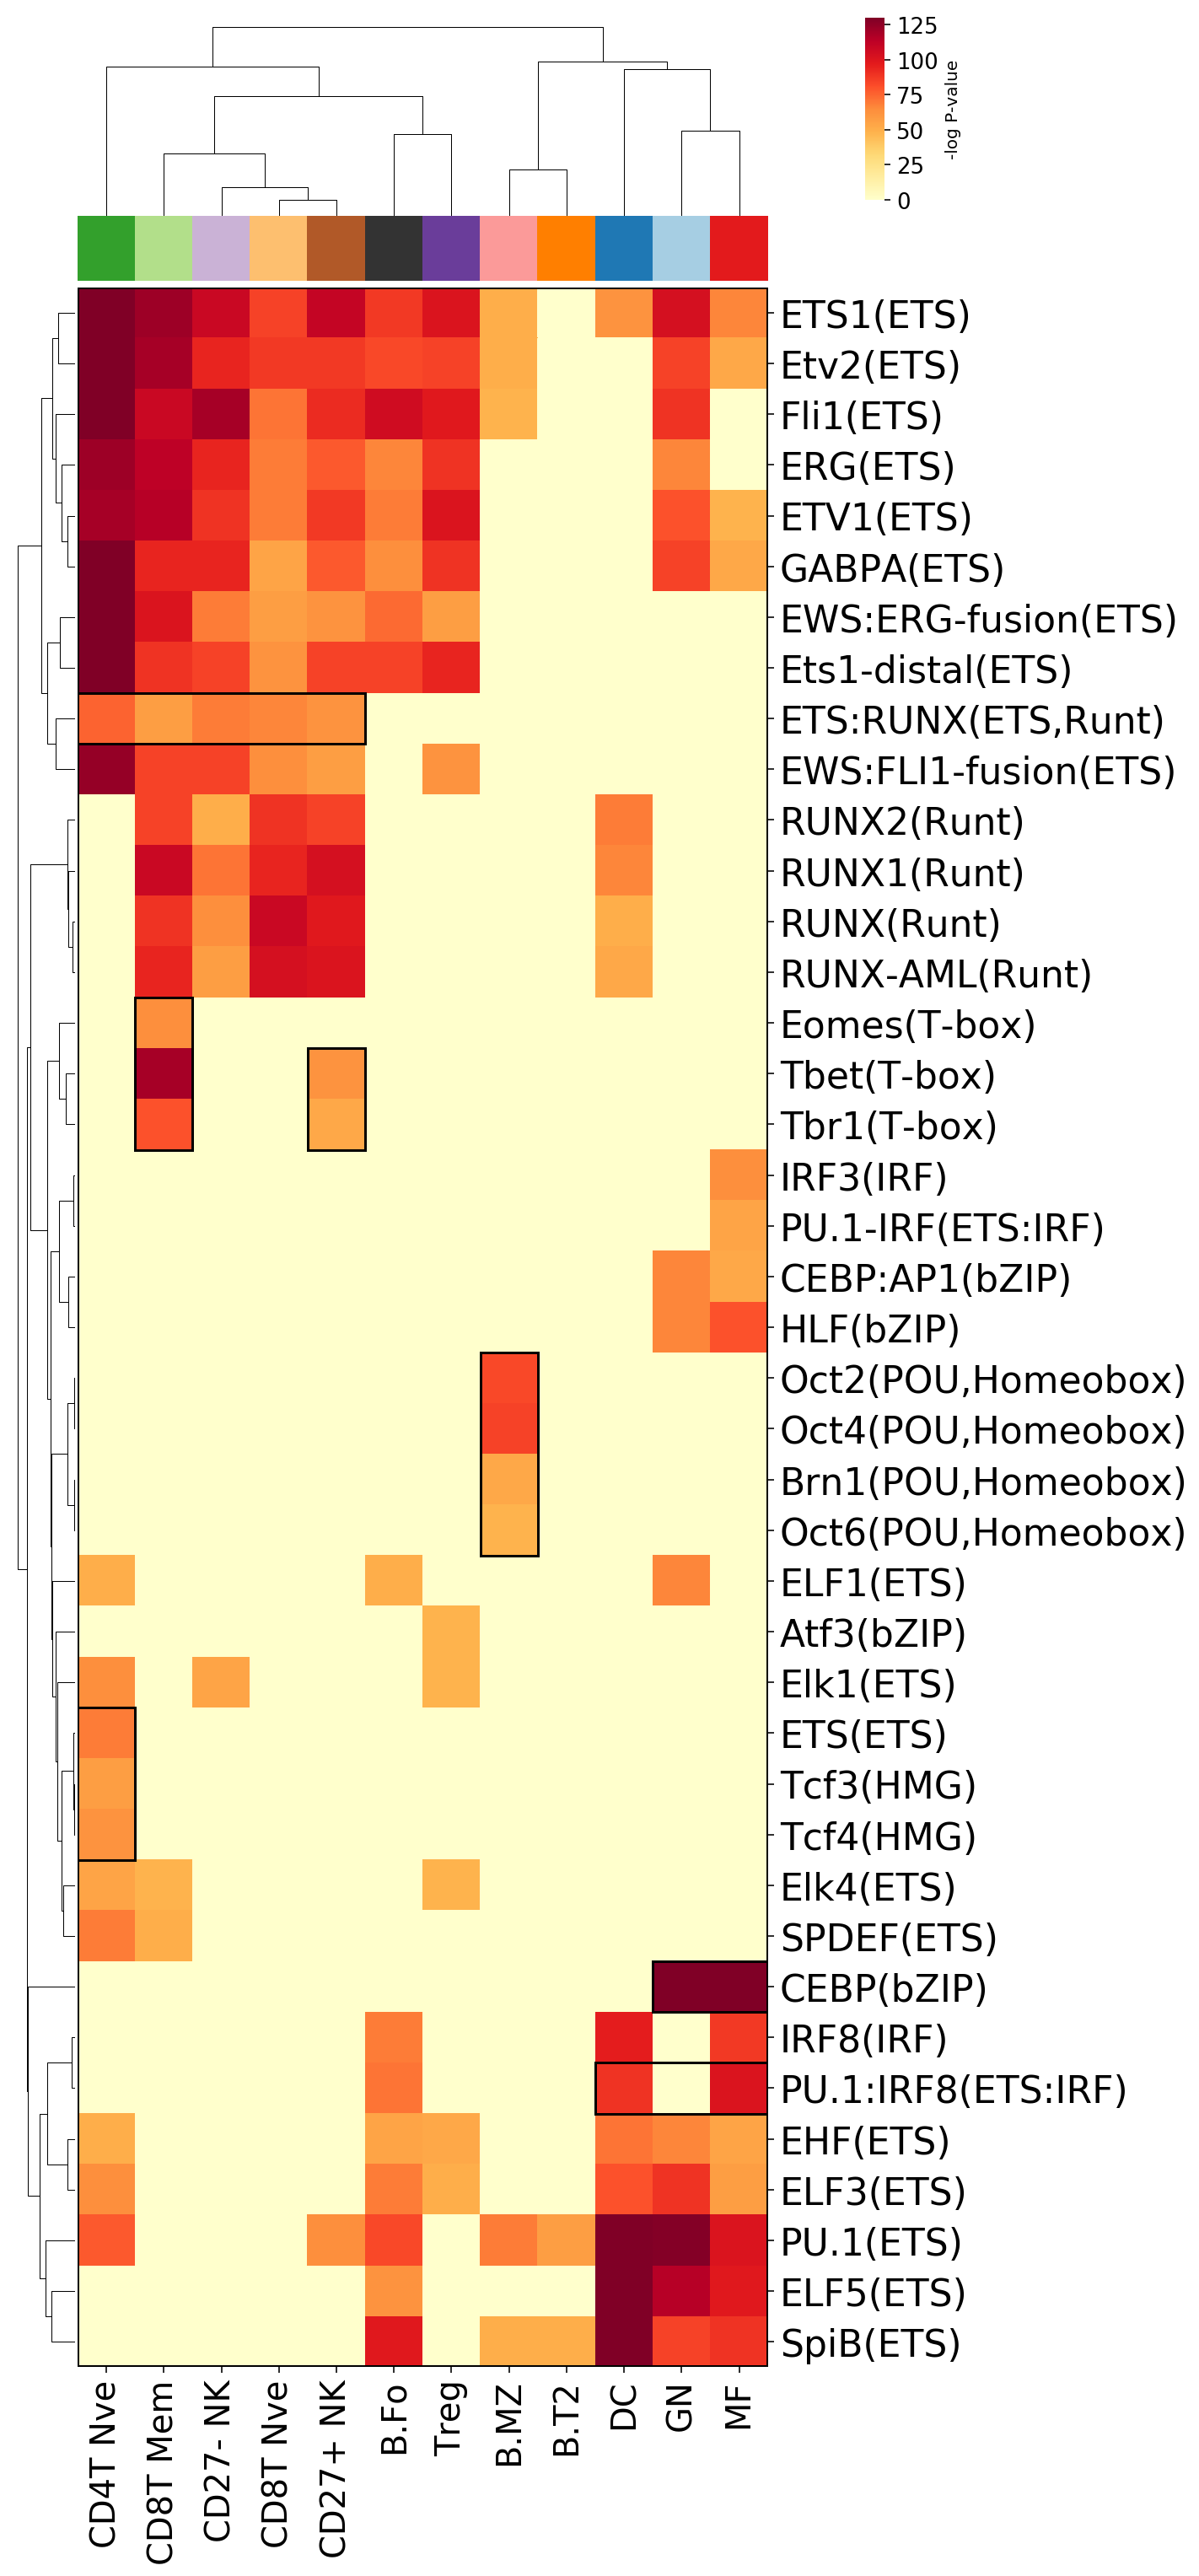

In [17]:
hcl = sns.clustermap(mtf_mtx, cmap='YlOrRd', vmin=0, vmax=130, figsize=(8,30),
                     linewidths=0, linecolor=None, rasterized=True,
                     cbar_kws={'label' : '-log P-value'},
                     col_colors=color12)

yts = hcl.ax_heatmap.get_yticklabels()
for yt in yts:
    yt.set_fontsize(22)

xts = hcl.ax_heatmap.get_xticklabels()
for xt in xts:
    xt.set_fontsize(20)
    xt.set_rotation(90)

hcl.cax.set_position([1, 0.72, 0.02, .05])
hcl.cax.set_yticklabels([str(i) for i in range(0,175,25)], fontsize=13)

# default col_dendrogram is too high and ugly
# manipulate the heith of the col_dendrogram
# it is not easy
col_den_pos = hcl.ax_col_dendrogram.get_position()
hcl.ax_col_dendrogram.set_position([col_den_pos.x0,
                                    col_den_pos.y0 * 0.95,
                                    col_den_pos.width,
                                    col_den_pos.height * 0.5])

# to make the col_color shorter
# the same way as the col_dendrogram
col_color_pos = hcl.ax_col_colors.get_position()
hcl.ax_col_colors.set_position([col_color_pos.x0,
                                col_color_pos.y0,
                                col_color_pos.width,
                                col_color_pos.height * 0.5])

# add a frame for the heatmap
hcl.ax_heatmap.axhline(y=0, color='k', linewidth=2)
hcl.ax_heatmap.axhline(y=41, color='k', linewidth=2)
hcl.ax_heatmap.axvline(x=0, color='k', linewidth=2)
hcl.ax_heatmap.axvline(x=12, color='k', linewidth=2)

# # highlight some motifs of interests
from matplotlib.patches import Rectangle

# highlight T-box motifs
hcl.ax_heatmap.add_patch(Rectangle((1,14), 1, 3, fill=False,
                                   edgecolor='k', lw=1.5))
hcl.ax_heatmap.add_patch(Rectangle((4,15), 1, 2, fill=False,
                                   edgecolor='k', lw=1.5))

# POU domain motif
hcl.ax_heatmap.add_patch(Rectangle((7, 21), 1, 4, fill=False,
                                   edgecolor='k', lw=1.5))
# ETS:RUNX composite motif
hcl.ax_heatmap.add_patch(Rectangle((0, 8), 5, 1, fill=False,
                                   edgecolor='k', lw=1.5))
# ETS and Tcf motif
hcl.ax_heatmap.add_patch(Rectangle((0, 28), 1, 3, fill=False,
                                   edgecolor='k', lw=1.5))
# CEBP motif
hcl.ax_heatmap.add_patch(Rectangle((10, 33), 2, 1, fill=False,
                                   edgecolor='k', lw=1.5))
# PU.1:IRF8 motif
hcl.ax_heatmap.add_patch(Rectangle((9, 35), 3, 1, fill=False,
                                   edgecolor='k', lw=1.5))
# hcl.savefig('figures/motifs_enrichments_heatmap.pdf',
#             bbox_inches='tight',
#             transparent=True)